In [85]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import requests
import json
import matplotlib.pyplot as plt

## Helper functions

In [99]:
def load_labels():
    # Download ImageNet lables
    labels_url = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
    response = requests.get(labels_url)
    #labels = response.open(BytesIO(response.content))
    labels = response.content.decode("utf-8")
    labels = json.loads(labels)
    
    return labels
    
def get_human_label(predictions):
    prediction_idx = np.argmax(predictions)
    
    return labels[str(prediction_idx)][1]

def plot_image_with_prediction(image, predictions):
    reshaped_image = np.reshape(image.numpy(), (image.shape[1], image.shape[2], 3))
    #reshaped_image = reshaped_image / 255.
    human_label = get_human_label(predictions)
    plt.axis("off")
    plt.title(human_label ,
          fontsize='20', pad=10)
    plt.imshow(reshaped_image)
    
labels = load_labels()

In [15]:
%ls -la ../assets/test_data/cow.jpeg

-rwx------ 1 hhughes hhughes 30832 Sep  9 15:22 ../assets/test_data/cow.jpeg*


In [19]:
img_path = '../assets/test_data/cow.jpeg'
img = Image.open(img_path)
img = img.convert('RGB')

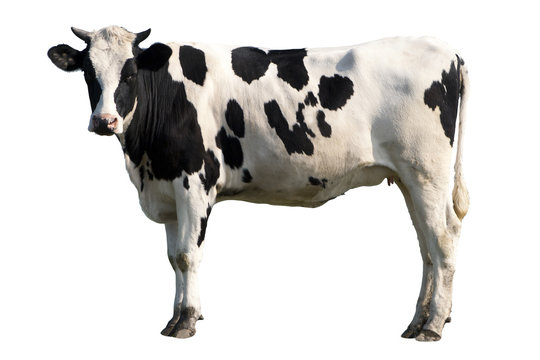

In [22]:
img

In [105]:
img_np = np.asarray(img)
print(img_np.shape)
img_np[100,150,1]

(360, 540, 3)


60

In [43]:
img_tf = tf.image.resize(img_np, [224, 224])
img_tf = tf.expand_dims(img_tf,0)
img_tf.shape

TensorShape([1, 224, 224, 3])

In [26]:
arch_input_shape = img_np.shape
arch_input_layer = tf.keras.Input(shape=arch_input_shape, name='img_input')

In [82]:
# Download ImageNet lables
labels_url = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
response = requests.get(labels_url)
#labels = response.open(BytesIO(response.content))
labels = response.content.decode("utf-8")
labels = json.loads(labels)
labels

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [48]:
base_model = tf.keras.applications.ResNet50V2(
    include_top=True,
    weights="imagenet",
    #input_tensor=arch_input_layer,
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)
base_model.summary()content

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [102]:
prediction = base_model.predict(img_tf)
prediction = np.argmax(prediction)
labels[str(prediction)][1]

1/1 [==============================] - 0s 184ms/step


'English_foxhound'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


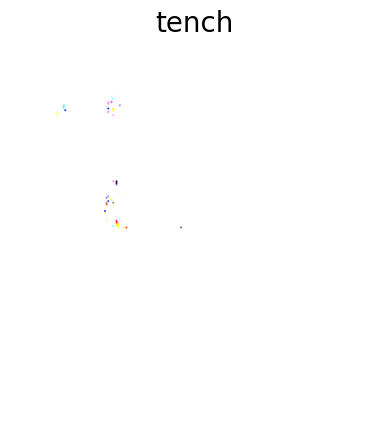

In [101]:
plot_image_with_prediction(img_tf, prediction)